In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('iris.csv').to_numpy()
data = df[:,1:5]
data.shape
x_train = data
x_var = data
y_var = data[:,0]

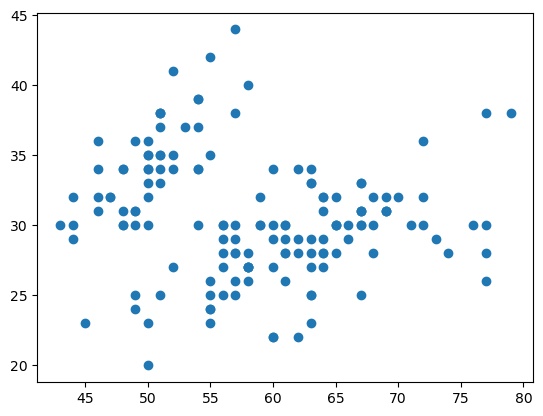

In [180]:
plt.scatter(df[:,1],df[:,2])
plt.show()

In [181]:
print('size of x_train :',x_train.shape)
print('size of x_var :',x_var.shape)
print('size of y_var :',y_var.shape)

size of x_train : (150, 4)
size of x_var : (150, 4)
size of y_var : (150,)


In [182]:
def estimate_gaussian(X): 
    """
    Calculates mean and variance of all features 
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """
    m,n = X.shape
    
    mu = 1/m * np.sum(X, axis = 0)
    var = 1/m * np.sum(((X - mu)**2), axis = 0)
    
    return mu, var

In [183]:
mu, var = estimate_gaussian(x_train)

print(f'value of mu : {mu}')
print(f'value of var : {var}')

value of mu : [58.43333333333334 30.573333333333334 37.580000000000005
 11.993333333333334]
value of var : [68.11222222222219 18.87128888888889 309.5502666666669 57.71328888888888]


In [184]:
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(max(p_val),min(p_val),step_size):
        prediction = (p_val < epsilon)
        
        tp = np.sum((predction == 1) & (y_val == 1))
        fp = np.sum((predction == 1) & (y_val == 0))
        fn = np.sum((predction == 0) & (y_val == 1))
        
        prec = tp / tp + fp 
        rec  = tp / tp + fn
        
        F1 = 2 * prec * rec /(prec + rec)
        
        if F1 < epsilon:
            best_F1 = F1
            best_epsilon = epsilon
            
    return best_F1, best_epsilon

In [185]:
F1, epsilon =  select_threshold(x_var, y_var)

In [186]:
print('value of epsilon :', epsilon)
print('value of F1 :', F1)

value of epsilon : 0
value of F1 : 0


In [189]:
from sklearn.ensemble import IsolationForest

In [214]:
gr = IsolationForest(contamination=0.5)
gr.fit(data)
prediction = gr.predict(data)

In [215]:
prediction

array([ 1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1])

In [216]:
index = np.where(prediction < 0)
index

(array([  1,   2,   3,   4,   7,   8,   9,  10,  12,  14,  17,  18,  19,
         24,  26,  27,  28,  30,  32,  37,  39,  42,  43,  44,  46,  51,
         55,  57,  58,  61,  65,  68,  70,  72,  76,  77,  78,  79,  83,
         85,  90,  93,  94,  96, 100, 101, 103, 107, 108, 109, 110, 111,
        112, 115, 117, 118, 119, 121, 123, 126, 127, 129, 130, 134, 135,
        136, 137, 138, 139, 140, 142, 143, 147, 148, 149], dtype=int64),)

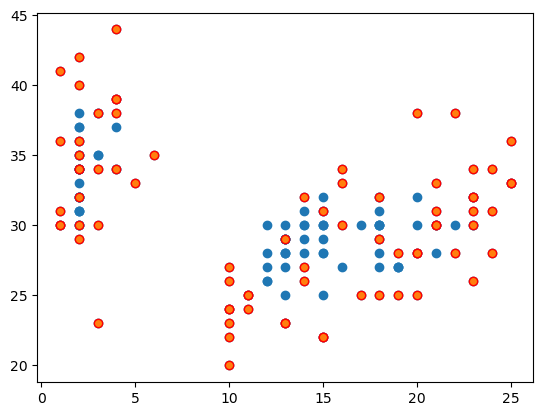

In [217]:
plt.scatter(data[:,3],data[:,1])
plt.scatter(data[index,3],data[index,1],edgecolors = 'r')
plt.show()

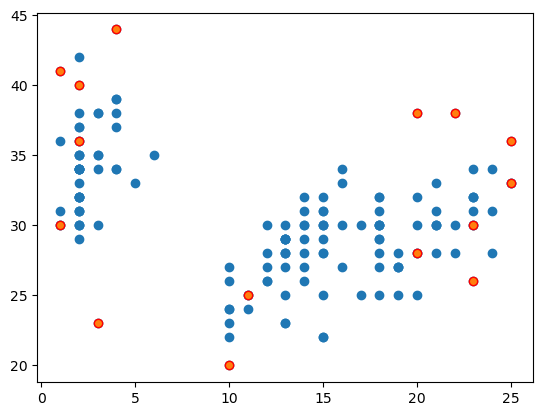

In [209]:
plt.scatter(data[:,3],data[:,1])
plt.scatter(data[index,3],data[index,1],edgecolors = 'r')
plt.show()